In [326]:
# Imports
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [327]:
# Reading Data
train_df = pd.read_csv("./data/train.csv")
test_df    = pd.read_csv("./data/test.csv")
train_df.is_copy = False
test_df.is_copy = False

In [328]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [329]:
#describing all columns
print('total observations : '+str(len(train_df.axes[0])))
train_df.describe()

total observations : 891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [330]:
#getting info of other valuable columns cabin and embarked
print("Missing Values Embarked : "+str(np.sum(train_df['Embarked'].isnull())))
print("Missing Values Cabin : "+str(np.sum(train_df['Cabin'].isnull())))

Missing Values Embarked : 2
Missing Values Cabin : 687


In [331]:
#Embarked
print("Frequency Table for Embarked")
train_df['Embarked'].value_counts()

Frequency Table for Embarked


S    644
C    168
Q     77
dtype: int64

In [332]:
#Replacing 2 missing Values of Embarked with the most occurred value, which is "S"
train_df["Embarked"] = train_df["Embarked"].fillna("S")

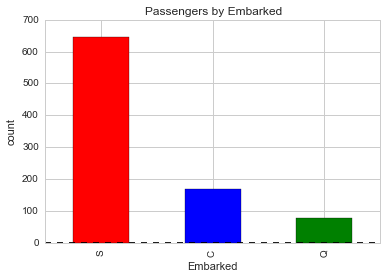

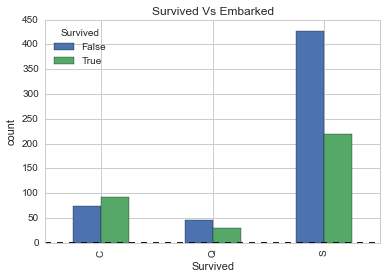

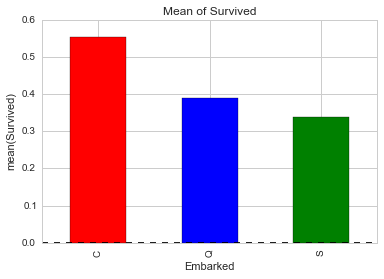

In [333]:
count_Embarked = train_df['Embarked'].value_counts()
survived_Embarked = pd.crosstab([train_df.Embarked], train_df.Survived.astype(bool))
Embarked_mean = train_df[["Embarked", "Survived"]].groupby(['Embarked']).mean()

ax1=count_Embarked.plot(kind='bar',color=['red','blue','green'])
ax1.set_xlabel('Embarked')
ax1.set_ylabel('count')
ax1.set_title("Passengers by Embarked")


ax2=survived_Embarked.plot(kind='bar')
ax2.set_xlabel('Survived')
ax2.set_ylabel('count')
ax2.set_title("Survived Vs Embarked")

ax3=Embarked_mean.plot(kind='bar',color=['red','blue','green'],legend=False)
ax3.set_xlabel('Embarked')
ax3.set_ylabel('mean(Survived)')
ax3.set_title("Mean of Survived")

In [334]:
#Embarked variable can be dropped because it is logically not useful for prediction only C and Q has good rate of survival
#Cabin variable also can be deleted as it has lot of missing values and does not help in prediction

In [335]:
#Family

#Merging 2 columns of family members i.e. sibsp and parch to see effect of family member on survival

train_df['Family_member'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family_member'].loc[train_df['Family_member'] > 0] = 1
train_df['Family_member'].loc[train_df['Family_member'] == 0] = 0

[<matplotlib.text.Text at 0x2b1ff7f0>, <matplotlib.text.Text at 0x27f71940>]

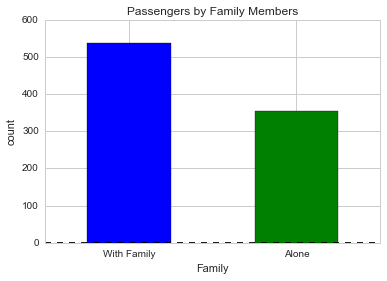

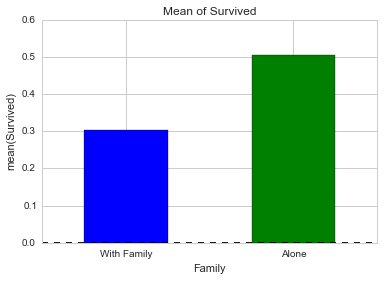

In [336]:
count_Family_member = train_df['Family_member'].value_counts()
Family_member_mean = train_df[["Family_member", "Survived"]].groupby(['Family_member']).mean()

ax1=count_Family_member.plot(kind='bar',color=['blue','green'])
ax1.set_xlabel('Family')
ax1.set_ylabel('count')
ax1.set_title("Passengers by Family Members")
ax1.set_xticklabels(["With Family","Alone"],rotation=0)

ax2=Family_member_mean.plot(kind='bar',color=['blue','green'],legend=False)
ax2.set_xlabel('Family')
ax2.set_ylabel('mean(Survived)')
ax2.set_title("Mean of Survived")
ax2.set_xticklabels(["With Family","Alone"],rotation=0)

In [337]:
#Fare

#converting the fare to int
train_df['Fare'] = train_df['Fare'].astype(int)

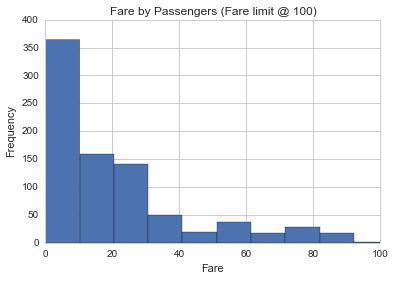

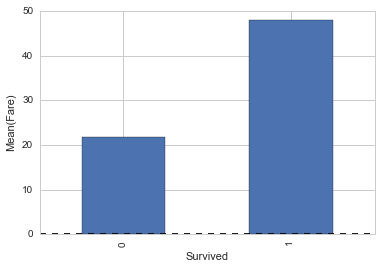

In [338]:
# get fare for survived & didn't survive passengers 
fare_not_survived = train_df["Fare"][train_df["Survived"] == 0]
fare_survived     = train_df["Fare"][train_df["Survived"] == 1]

# get average fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])

ax1 = train_df['Fare'].plot(kind='hist',bins=50,xlim=(0,100))
ax1.set_xlabel('Fare')
ax1.set_ylabel('Frequency')
ax1.set_title("Fare by Passengers (Fare limit @ 100)")

ax2 = avgerage_fare.plot(kind='bar',legend=False)
ax2.set_xlabel('Survived')
ax2.set_ylabel('Mean(Fare)')

In [339]:
#Age

# Since there are 97 missing values in Age we will replace the missing values with the mean Age

mean_age_train   = train_df["Age"].mean()
train_df["Age"] = train_df["Age"].fillna(mean_age_train)

# convert from float to int
train_df['Age'] = train_df['Age'].astype(int)

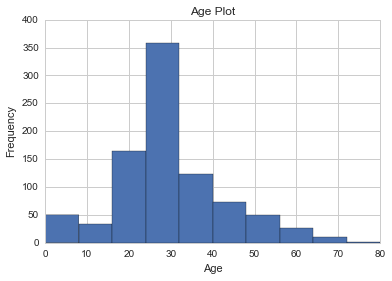

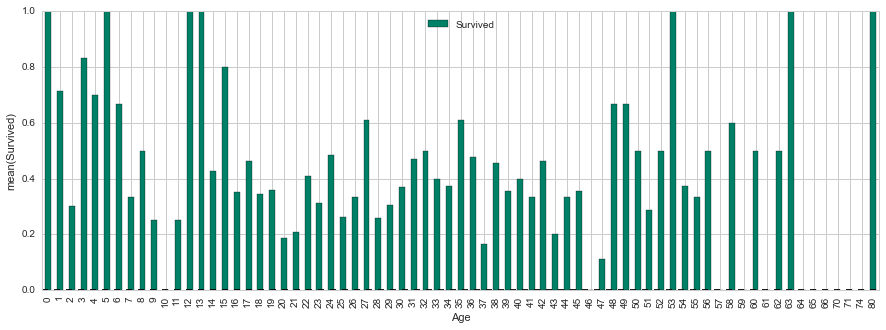

In [340]:
# average survived by age
average_age = train_df[["Age", "Survived"]].groupby(['Age']).mean()

ax1 = train_df['Age'].plot(kind='hist')
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.set_title("Age Plot")

ax2 = average_age.plot(kind='bar',figsize=(15,5),colormap='summer')
ax2.set_xlabel("Age")
ax2.set_ylabel("mean(Survived)")

In [341]:
#sex

# As we can see that children(age<=16) seem to have high chances for survival so we can classify passengers as males, females 
#and child

train_df['Person'] = train_df['Sex']
train_df['Person'][train_df['Age']<16]='child'

C:\Users\anuj.gupta\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


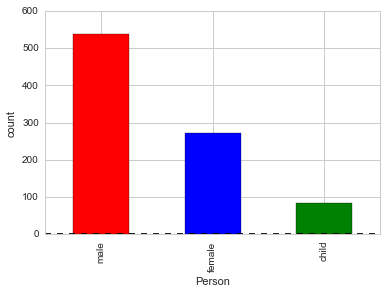

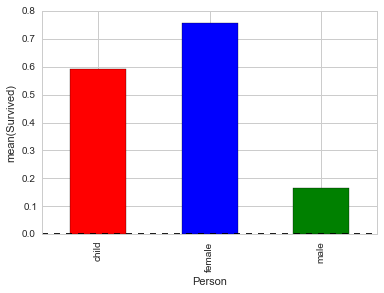

In [342]:
#Plots
count_Person = train_df['Person'].value_counts()
Person_mean = train_df[["Person", "Survived"]].groupby(['Person']).mean()

ax1=count_Person.plot(kind='bar',color=['red','blue','green'])
ax1.set_xlabel('Person')
ax1.set_ylabel('count')

ax2=Person_mean.plot(kind='bar',color=['red','blue','green'],legend=False)
ax2.set_xlabel('Person')
ax2.set_ylabel('mean(Survived)')


In [343]:
# as we can see from above graph that male has the lowest average of survived passengers so we will create a dummy variable
#for person and drop male category

Person_dummy_train  = pd.get_dummies(train_df['Person'])
Person_dummy_train.columns = ['Male','Female','Child']
Person_dummy_train.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(Person_dummy_train)

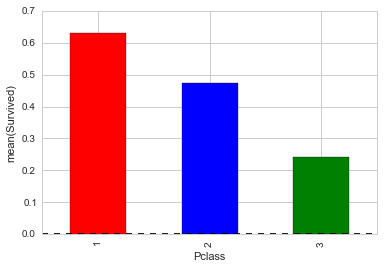

In [344]:
#Pclass

Pclass_mean = train_df[["Pclass", "Survived"]].groupby(['Pclass']).mean()

ax1=Pclass_mean.plot(kind='bar',color=['red','blue','green'],legend=False)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('mean(Survived)')

In [345]:
# As We can see that the 3rd classs has the lowest average of survived passengers so we will drop 3rd class and create a 
#dummy variable for Pclass

pclass_dummy_train  = pd.get_dummies(train_df['Pclass'])
pclass_dummy_train.columns = ['Class1','Class2','Class3']
pclass_dummy_train.drop(['Class3'], axis=1, inplace=True)

train_df = train_df.join(pclass_dummy_train)

In [346]:
# dropping all the unnecessary columns from training set
train_df = train_df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Embarked','Cabin','Sex','Person','Pclass'], axis=1)

In [347]:
#test Data
# Making all the computations to test data set and dropping the unnecessary columns

#describing all columns
print('total observations : '+str(len(test_df.axes[0])))
test_df.describe()

total observations : 418


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [348]:
# Fare - Replacing the missing values with median Fare value
median_fare_test   = test_df["Fare"].median()
test_df["Fare"] = test_df["Fare"].fillna(median_fare_test)
test_df['Fare'] = test_df['Fare'].astype(int)

In [349]:
#Family Flag
test_df['Family_member'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family_member'].loc[test_df['Family_member'] > 0] = 1
test_df['Family_member'].loc[test_df['Family_member'] == 0] = 0

In [350]:
#Age
mean_age_test   = test_df["Age"].mean()
test_df["Age"] = test_df["Age"].fillna(mean_age_test)

# convert from float to int
test_df['Age'] = test_df['Age'].astype(int)

In [351]:
#Person flag from Sex
test_df['Person'] = test_df['Sex']
test_df['Person'][test_df['Age']<16]='child'

Person_dummy_test  = pd.get_dummies(test_df['Person'])
Person_dummy_test.columns = ['Male','Female','Child']
Person_dummy_test.drop(['Male'], axis=1, inplace=True)

test_df = test_df.join(Person_dummy_test)

C:\Users\anuj.gupta\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [352]:
#Pclass
pclass_dummy_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummy_test.columns = ['Class1','Class2','Class3']
pclass_dummy_test.drop(['Class3'], axis=1, inplace=True)

test_df = test_df.join(pclass_dummy_test)

In [353]:
#dropping variables
test_df = test_df.drop(['Name','Ticket','SibSp','Parch','Embarked','Cabin','Sex','Person','Pclass'], axis=1)

In [354]:
# training and testing sets
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [355]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.80246913580246915

In [356]:
# get Correlation Coefficient for each feature
coeff_df = DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

In [358]:
coeff_df

,Features,Coefficient Estimate
0,Age,-0.021844
1,Fare,0.001638
2,Family_member,-0.293241
3,Female,0.831441
4,Child,-2.070780
5,Class1,2.126323
6,Class2,1.087283


In [359]:
output = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
output.to_csv('titanic.csv', index=False)